In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile

file_name = "/content/drive/MyDrive/archive.zip"
with ZipFile(file_name,'r') as zipp:
  zipp.extractall()
  print('Done')

Done


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import string
import random
import tensorflow as tf

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#from nltk.collocations import *
#from nltk import FreqDist, word_tokenize

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing

from keras import optimizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Activation, LSTM, GRU, Dense, GlobalMaxPool1D, Embedding, Dropout, Conv1D,Flatten
from keras.models import Sequential, Model
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [ ]:
from keras import backend
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
import warnings
warnings.filterwarnings('ignore')
from keras.utils.vis_utils import plot_model

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
# train data
drug_review_train = pd.read_csv("/content/drugsComTrain_raw.csv")

# test data
drug_review_test = pd.read_csv("/content/drugsComTest_raw.csv")

In [ ]:
# combining train and test data to have more flexibility during testing phase and to ease scrubbing step.
drugs = pd.concat([drug_review_test, drug_review_train])
drugs.reset_index(inplace=True)

In [ ]:
drugs.isna().sum()

index             0
uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [ ]:
drugs.dropna(inplace=True)

In [ ]:
drugs.isna().sum()

index          0
uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

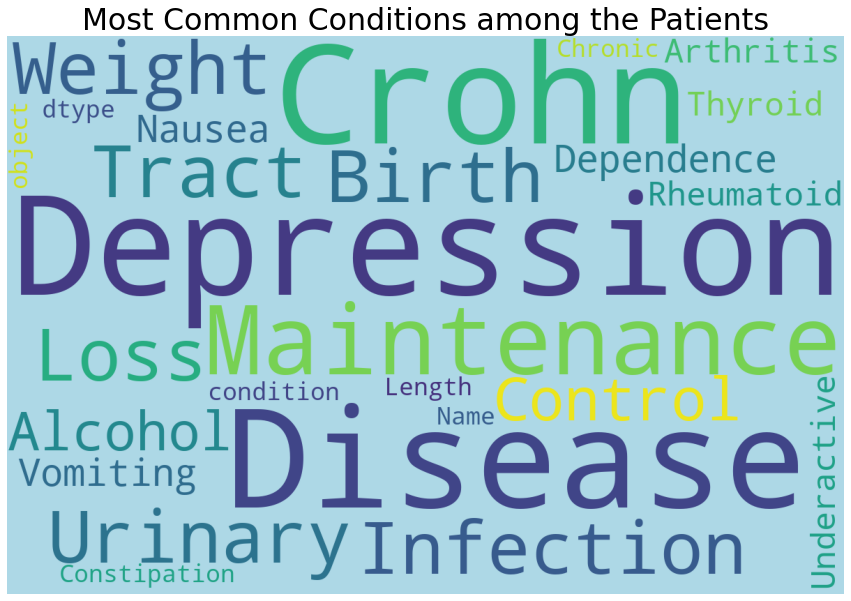

In [ ]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, max_words = 100, width = 1200, height = 800).generate(str(drugs['condition']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Common Conditions among the Patients', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

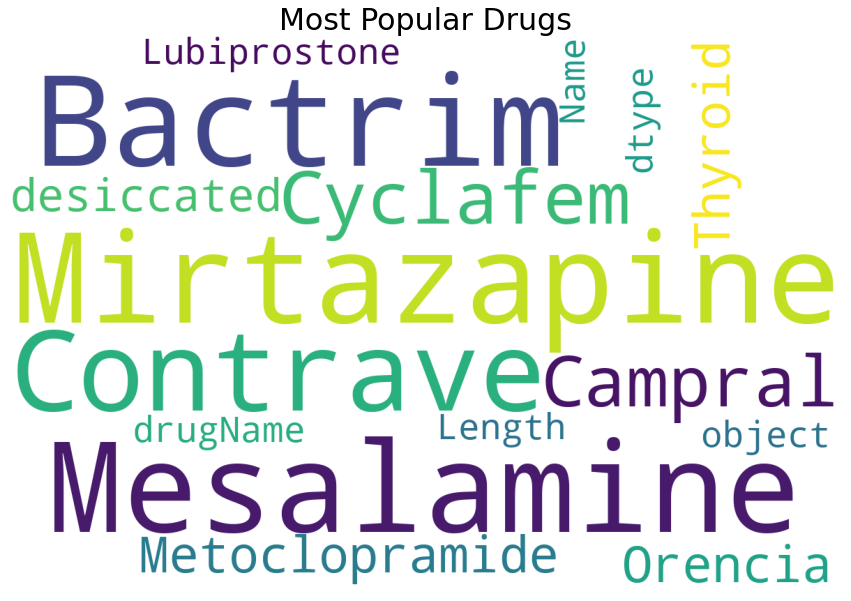

In [ ]:
# most popular drugs

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width = 1200, height = 800).generate(str(drugs['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Popular Drugs', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

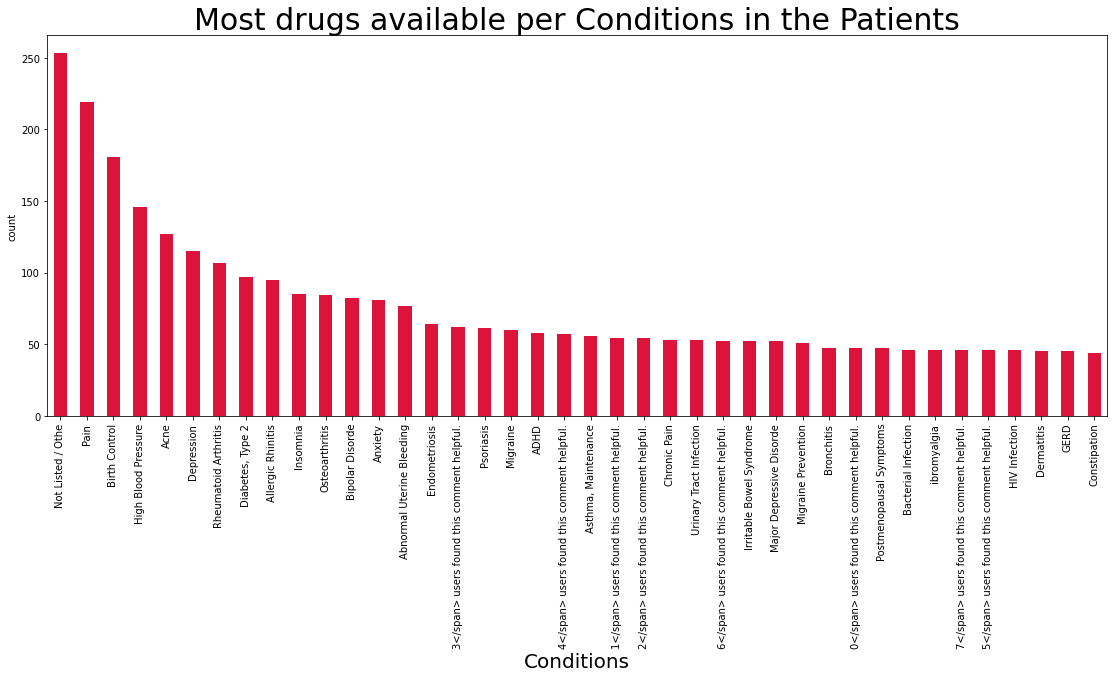

In [ ]:
# checking the most popular drugs per conditions

drugs.groupby(['condition'])['drugName'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (19, 7), color = 'crimson')
plt.title('Most drugs available per Conditions in the Patients', fontsize = 30)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count')
plt.show()

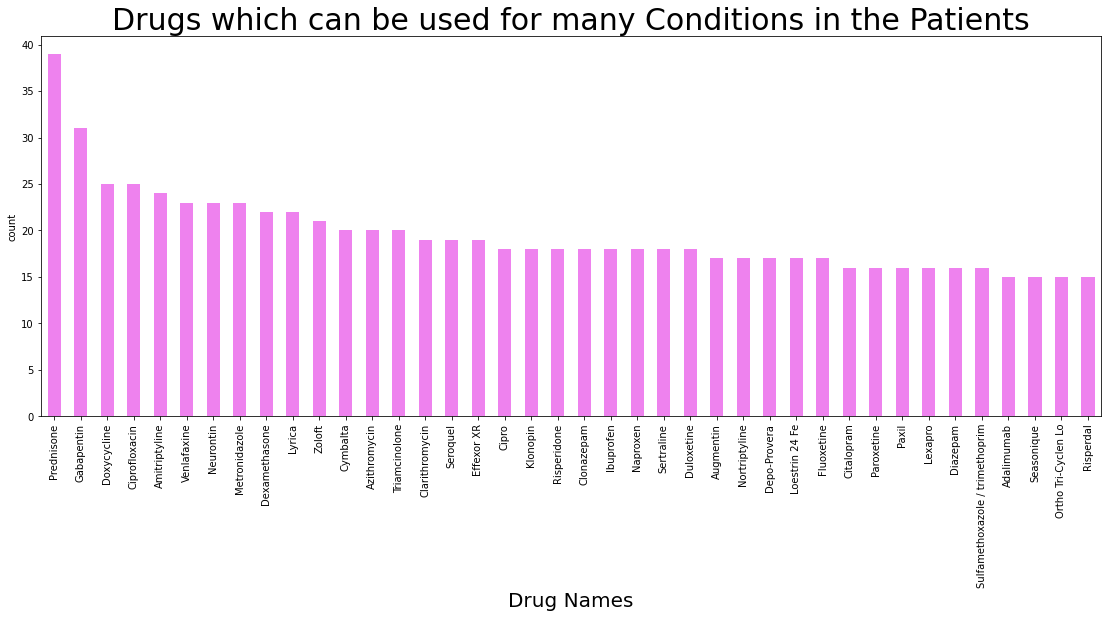

In [ ]:
# checking the most popular drugs per conditions

drugs.groupby(['drugName'])['condition'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (19, 7), color = 'violet')
plt.title('Drugs which can be used for many Conditions in the Patients', fontsize = 30)
plt.xlabel('Drug Names', fontsize = 20)
plt.ylabel('count')
plt.show()

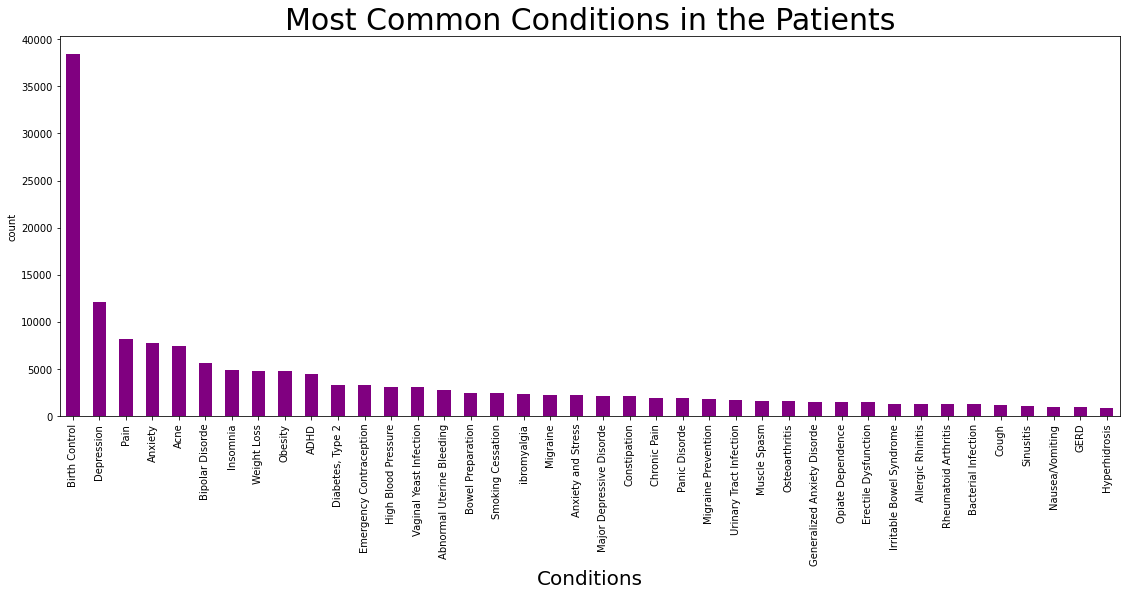

In [ ]:
# checking the different types of conditions patients


drugs['condition'].value_counts().head(40).plot.bar(figsize = (19, 7), color = 'purple')
plt.title('Most Common Conditions in the Patients', fontsize = 30)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count')
plt.show()

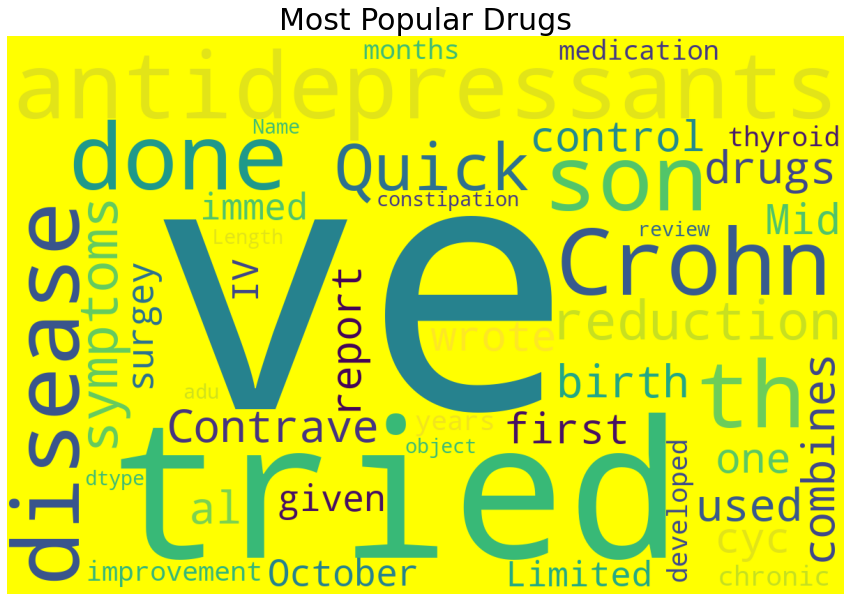

In [ ]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'yellow', stopwords = stopwords, width = 1200, height = 800).generate(str(drugs['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Popular Drugs', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
drugs.loc[(drugs['rating'] >= 5), 'Review_Sentiment'] = 1
drugs.loc[(drugs['rating'] < 5), 'Review_Sentiment'] = 0

drugs['Review_Sentiment'].value_counts()

1.0    160613
0.0     53256
Name: Review_Sentiment, dtype: int64

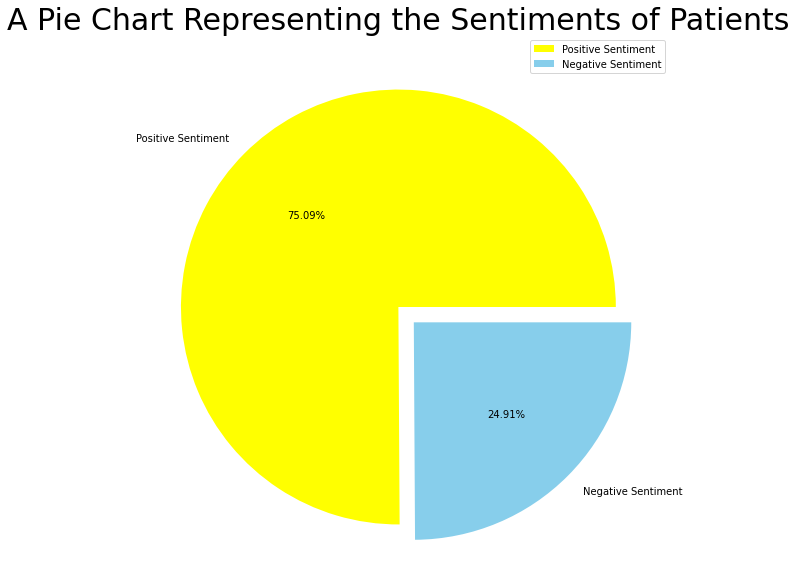

In [ ]:
# a pie chart to represent the sentiments of the patients

size = [161491, 53572]
colors = ['yellow', 'skyblue']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Sentiments of Patients', fontsize = 30)
plt.legend()
plt.show()

In [ ]:
drugs.date = pd.to_datetime(drugs.date)

In [ ]:
drugs.date = pd.to_datetime(drugs.date)
drugs['year'] = drugs.date.dt.year

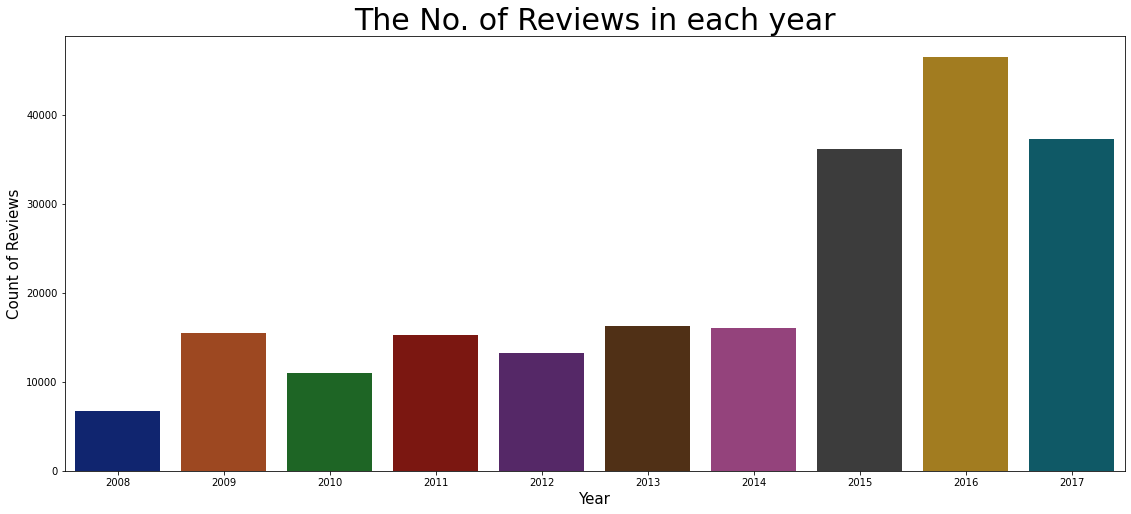

In [ ]:
# looking at the no. of reviews in each of the year

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(drugs['year'], palette ='dark')
plt.title('The No. of Reviews in each year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

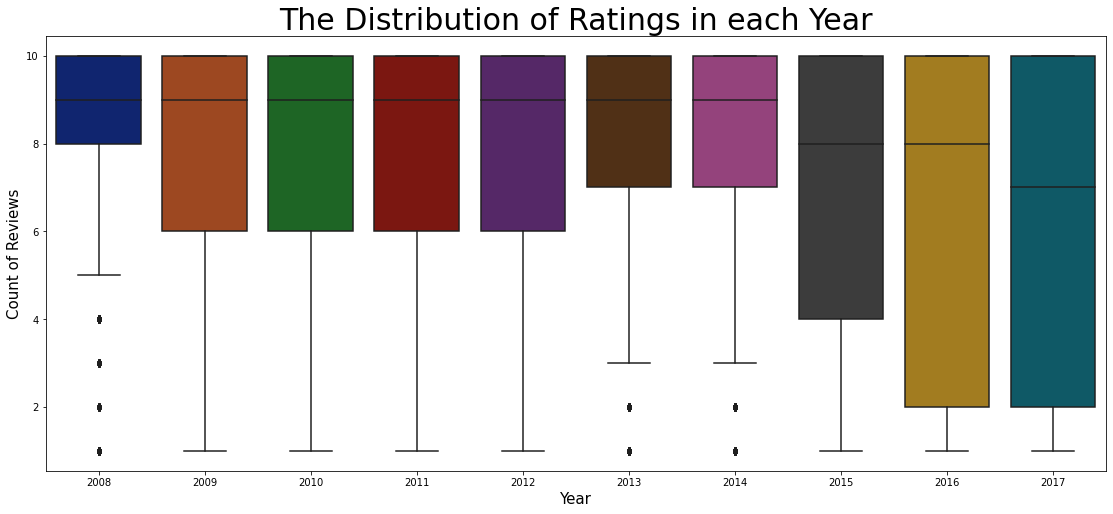

In [ ]:
# looking at the no. of ratings in each of the year

plt.rcParams['figure.figsize'] = (19, 8)
sns.boxplot(x = drugs['year'], y = drugs['rating'], palette ='dark')
plt.title('The Distribution of Ratings in each Year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

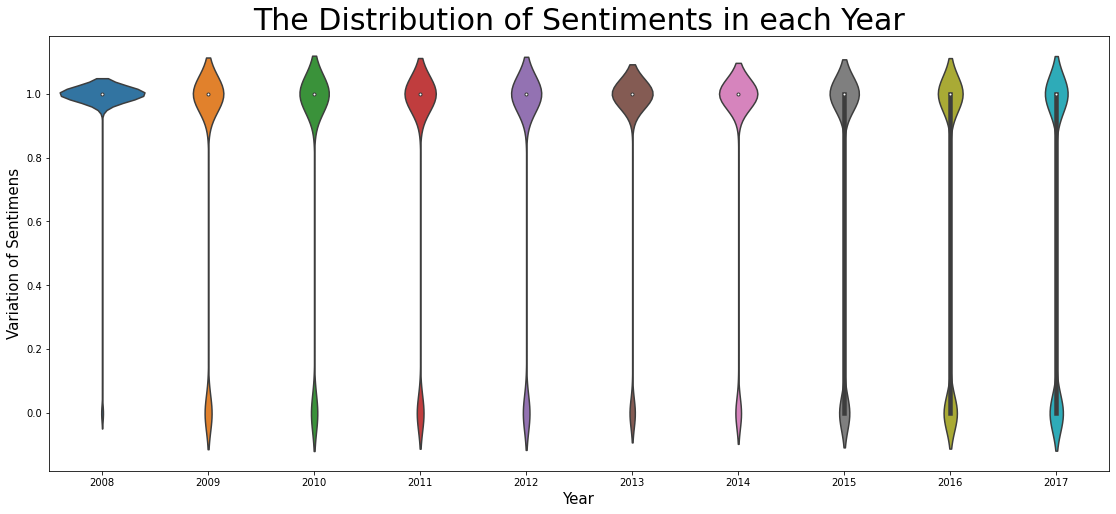

In [ ]:
# looking at the sentiment dstribution in each of the year

plt.rcParams['figure.figsize'] = (19, 8)
sns.violinplot(x = drugs['year'], y = drugs['Review_Sentiment'])
plt.title('The Distribution of Sentiments in each Year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Variation of Sentimens', fontsize = 15)
plt.show()

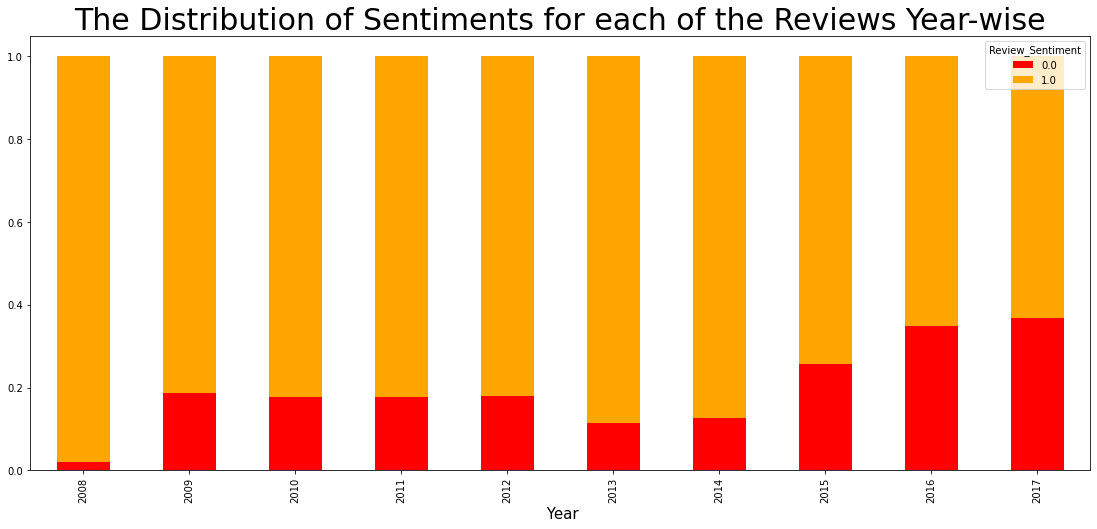

In [ ]:
# plotting a stacked bar to see in which year what were the sentiments

df = pd.crosstab(drugs['year'] ,drugs['Review_Sentiment'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (19, 8), color = ['red', 'orange', 'pink'])
plt.title('The Distribution of Sentiments for each of the Reviews Year-wise', fontsize = 30)
plt.xlabel(' Year', fontsize = 15)
plt.show()

In [ ]:
drugs.sample(5)

,index,uniqueID,drugName,condition,review,rating,date,usefulCount
158214,104448,136199,Relpax,Migraine,"""This medicine has given me my life back; I do...",9,12-Nov-11,5
190274,136508,61323,Premarin,Postmenopausal Symptoms,"""So I just started this yesterday and wonder I...",10,13-Oct-17,3
146621,92855,95540,Bontril Slow Release,Obesity,"""I took this a while back and lost 16 lbs in o...",9,10-Sep-14,78
16858,16858,21071,Paliperidone,Schizophrenia,"""I had been on Haldol before which I am allerg...",9,25-Jan-17,11
186865,133099,146165,Suboxone,Opiate Dependence,"""I found Suboxone to be a miracle. It saved my...",10,15-Mar-11,7


In [ ]:
drugs.review = drugs.review.str.lower()
drugs.review = drugs.review.str.replace('&#039;', "'")
drugs.review = drugs.review.str.replace('&\w+;',' ')
drugs.review = drugs.review.str.replace(r"[^a-z'A-Z]+", " ")

In [ ]:
def text_to_tokens(text):
    stopwords_list = stopwords.words('english') 
    stopwords_list += [i for i in ["i'm", "i've", "mg", "ml","'ve","'s", "can't", "i'd", "that's", "ya'll", "get's"]]
    return [i for i in list(set(text.split())) if i not in stopwords_list]

def lemm(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    string = ''
    for word in text:
        string += wordnet_lemmatizer.lemmatize(word, pos="v")+' '
    return string.strip()

In [ ]:
tokens = drugs.review.map(text_to_tokens)

In [ ]:
drugs['lemm_review'] = tokens.map(lemm)

In [ ]:
drugs.lemm_review = drugs.lemm_review.str.replace("'", "")

In [ ]:
drugs.sample(5)

,index,uniqueID,drugName,condition,review,rating,date,usefulCount,year,lemm_review
71741,17975,8345,Zolpidem,Insomnia,helps put my mind in a blank slate my mind is...,10,2015-04-28,66,2015,time sedate help calm soothe sleep worry night...
144394,90628,131842,Effexor XR,Major Depressive Disorde,i'm taking this and remeron for major depress...,7,2014-06-29,40,2014,change sweat along disorder get will take year...
67844,14078,78136,Zyprexa,Bipolar Disorde,got hospitalized upped to mg morning and even...,8,2013-03-28,43,2013,zyprexa gain morning fast dose great hospitali...
186237,132471,39053,Contrave,Obesity,i have only been on it ten days and have not ...,8,2017-06-21,43,2017,ago foods take appetite try choices healthy pi...
168863,115097,220927,Diclofenac / misoprostol,Rheumatoid Arthritis,i was on arthrotec for about years and found ...,9,2009-06-27,28,2009,drug prednisone soon work years wait arthrotec...


In [ ]:
drugs.describe()

,index,uniqueID,rating,usefulCount,year
count,213869.000000,213869.000000,213869.000000,213869.000000,213869.000000
mean,67216.843025,116076.924786,6.991149,28.094118,2013.956511
std,47210.086618,67016.705794,3.275792,36.401377,2.708257
min,0.000000,0.000000,1.000000,0.000000,2008.000000
25%,26884.000000,58122.000000,5.000000,6.000000,2012.000000
50%,53789.000000,115972.000000,8.000000,16.000000,2015.000000
75%,107542.000000,174018.000000,10.000000,36.000000,2016.000000
max,161296.000000,232291.000000,10.000000,1291.000000,2017.000000


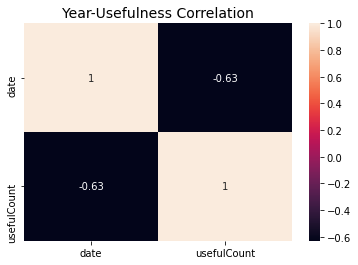

In [ ]:
# Returns new dataframe with average useful count for each year
usefulness_df = drugs.groupby(drugs.date.dt.year).usefulCount.mean().to_frame().reset_index()

sns.heatmap(usefulness_df.corr(), annot=True)
plt.title('Year-Usefulness Correlation', fontSize=14)
plt.show()

#Negative correlation between years and useful counts is not strong, but it's not totally random

In [ ]:
#ANOVA test for usefulCount per year

import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'usefulCount ~ C(year)'
lm = ols(formula, drugs).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                sum_sq        df            F  PR(>F)
C(year)   4.104696e+07       9.0  4024.750995     0.0
Residual  2.423410e+08  213859.0          NaN     NaN


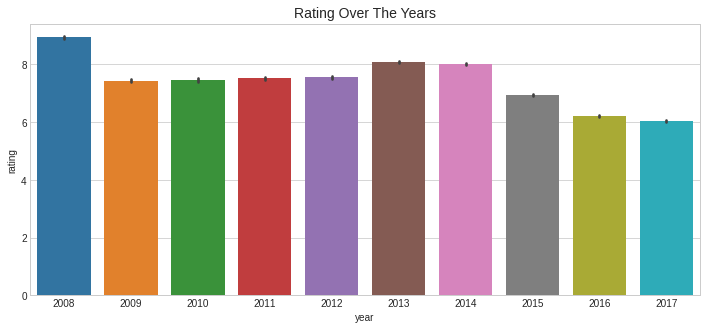

In [ ]:
#Rating Over the Years

plt.figure(figsize=(12,5))
plt.style.use('seaborn-whitegrid')
sns.barplot(x='year', y='rating', data=drugs)
plt.title('Rating Over The Years', fontSize=14)
plt.show()

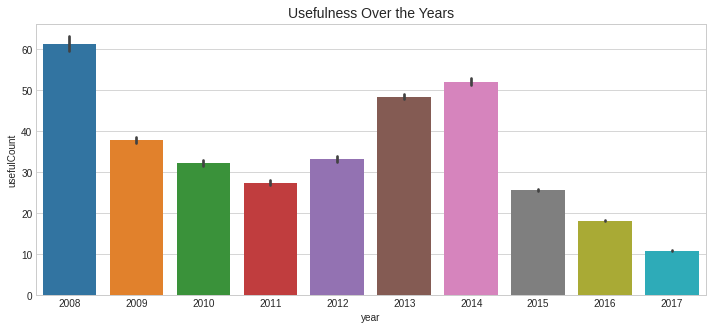

In [ ]:
#Usefulness Over the Years

plt.figure(figsize=(12,5))
sns.barplot(x='year', y='usefulCount', data=drugs)
plt.title('Usefulness Over the Years', fontSize=14)
plt.show()

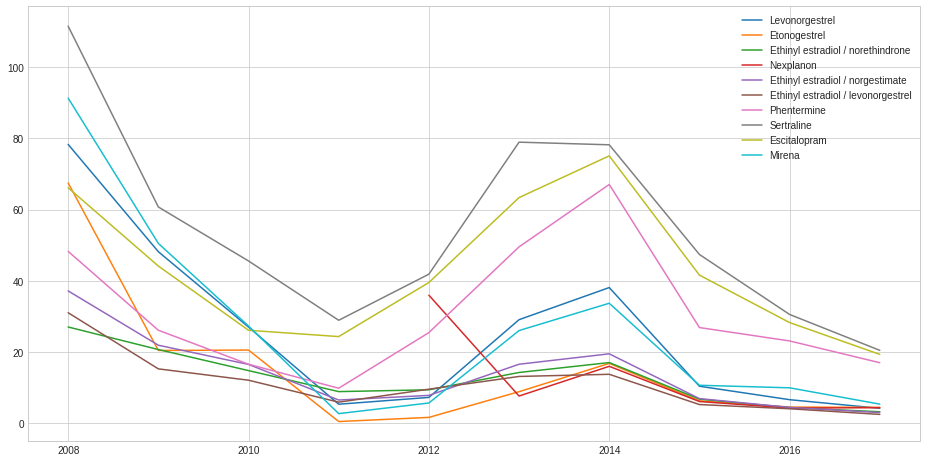

In [ ]:
#Top 10 Drugs Usefulness Over the Years

plt.figure(figsize=(16,8))

top_10_drugs = list(drugs.drugName.value_counts()[:10].keys())
for i in top_10_drugs:
    plt.plot(drugs[drugs.drugName==i].groupby('year').mean()[['usefulCount']], label=i)
    plt.legend()

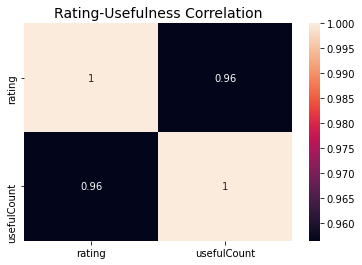

In [ ]:
sns.heatmap(drugs.groupby('year')[['rating','usefulCount']].mean().corr(), annot=True)
plt.title('Rating-Usefulness Correlation', fontSize=14)
plt.show()

#Reviews with higher rating appear to be more useful for users

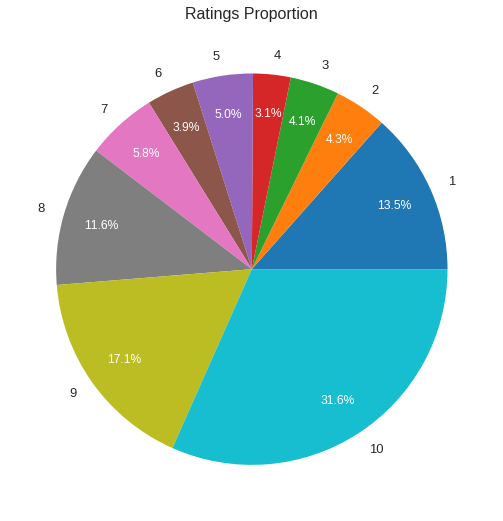

In [ ]:
#Distribution of Rating Across All Reviews

plt.figure(figsize=(9,9))

rating_count = drugs.groupby('rating')['review'].count()
sizes = rating_count.values
labels = rating_count.keys()

wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1)
plt.setp(autotexts, size=12, color='w')
plt.setp(texts, size=13,)
plt.title('Ratings Proportion', fontSize=16)
plt.show()

In [ ]:
#Top Rated Drugs For a Condition

def top_rated_drug_for_condition(condition='Depression', return_n=10):
    rating, count = [], []
    top_drugs = drugs[drugs.condition == condition].drugName.value_counts().head(return_n).keys()
    for i in top_drugs:
        rating.append(round(drugs[drugs.drugName==i].rating.mean(), 2))
        count.append(sum(drugs.drugName==i))
    return pd.DataFrame(np.array([top_drugs, rating, count]).T, columns=['Name','Rating','Count']).sort_values('Rating', ascending=False)

In [ ]:
top_rated_drug_for_condition('Birth Control')

,Name,Rating,Count
2,Levonorgestrel,7.39,4896
8,Skyla,7.24,1076
7,Mirena,6.62,1673
6,Implanon,6.18,1506
9,Lo Loestrin Fe,6.07,914
0,Etonogestrel,5.83,4402
5,Ethinyl estradiol / norgestimate,5.79,2682
4,Ethinyl estradiol / levonorgestrel,5.76,2400
3,Nexplanon,5.64,2892
1,Ethinyl estradiol / norethindrone,5.58,3619


In [ ]:
top_rated_drug_for_condition('Depression')

,Name,Rating,Count
5,Escitalopram,7.83,1739
6,Citalopram,7.6,1306
0,Bupropion,7.48,1360
1,Sertraline,7.45,1859
4,Pristiq,7.23,730
3,Desvenlafaxine,7.21,793
2,Venlafaxine,6.83,1332
9,Cymbalta,6.63,1142
8,Duloxetine,6.62,1251
7,Vortioxetine,6.13,681


In [ ]:
top_rated_drug_for_condition('Pain')

,Name,Rating,Count
8,Dilaudid,8.52,264
2,Oxycodone,8.5,641
3,Acetaminophen / oxycodone,8.49,510
6,Hydromorphone,8.38,346
1,Acetaminophen / hydrocodone,8.08,683
5,Diclofenac,7.88,616
7,Gabapentin,7.42,1409
0,Tramadol,7.08,1132
4,Tapentadol,6.53,293
9,Nucynta,6.32,206


In [ ]:
def hot_pad_sequences(text, num_words=3000, maxlen=100):    
    tokenizer = Tokenizer(num_words)
    tokenizer.fit_on_texts(list(text))
    list_tokenized_headlines = tokenizer.texts_to_sequences(text)
    return sequence.pad_sequences(list_tokenized_headlines, maxlen)

In [ ]:
def hot_tokenization(text, num_words=2000):
    tokenizer = Tokenizer(num_words)
    tokenizer.fit_on_texts(text)
    return tokenizer.texts_to_matrix(text, mode='binary')

In [ ]:
def hot_label_encoding(labels):
    le = preprocessing.LabelEncoder()
    le.fit(labels)
    labels_cat = le.transform(labels)
    return to_categorical(labels_cat)

In [ ]:
top_10_conditions = drugs.set_index('condition').loc[drugs.condition.value_counts()[:10].keys()]

In [ ]:
top_10_conditions.shape

(98723, 9)

##Predicting Condition Based on Review

In [ ]:
X_t = hot_tokenization(top_10_conditions.lemm_review, 3000)
y = hot_label_encoding(top_10_conditions.index)
train, test, label_train, label_test = train_test_split(X_t, y, test_size=0.2, random_state=42)

In [ ]:
X_t.shape

(98723, 3000)

In [ ]:
train.shape

(78978, 3000)

In [ ]:
test.shape

(19745, 3000)

In [ ]:
label_train.shape

(78978, 10)

In [ ]:
label_test.shape

(19745, 10)

In [ ]:
backend.clear_session()

In [ ]:
model = Sequential()
model.add(Embedding(3000, 100, input_length=3000))
model.add(Conv1D(60, 2, activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 3000, 100)         300000    
_________________________________________________________________
conv1d (Conv1D)              (None, 2999, 60)          12060     
_________________________________________________________________
global_max_pooling1d (Global (None, 60)                0         
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 40)                2440      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                4

In [ ]:
model.compile(optimizer=optimizers.Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
label_train.shape

(78978, 10)

In [ ]:
history = model.fit(train, label_train, epochs=50, batch_size=256, validation_split=0.1)

Epoch 1/50
278/278 [==============================] - 515s 2s/step - loss: 2.0029 - accuracy: 0.3771 - val_loss: 1.9398 - val_accuracy: 0.4009
Epoch 2/50
278/278 [==============================] - 520s 2s/step - loss: 1.9595 - accuracy: 0.3885 - val_loss: 1.9368 - val_accuracy: 0.4009
Epoch 3/50
278/278 [==============================] - 521s 2s/step - loss: 1.9564 - accuracy: 0.3881 - val_loss: 1.9359 - val_accuracy: 0.4009
Epoch 4/50
278/278 [==============================] - 519s 2s/step - loss: 1.9545 - accuracy: 0.3877 - val_loss: 1.9367 - val_accuracy: 0.4009
Epoch 5/50
278/278 [==============================] - 521s 2s/step - loss: 1.9533 - accuracy: 0.3886 - val_loss: 1.9375 - val_accuracy: 0.4009
Epoch 6/50
100/278 [=========>....................] - ETA: 5:25 - loss: 1.9472 - accuracy: 0.3950

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

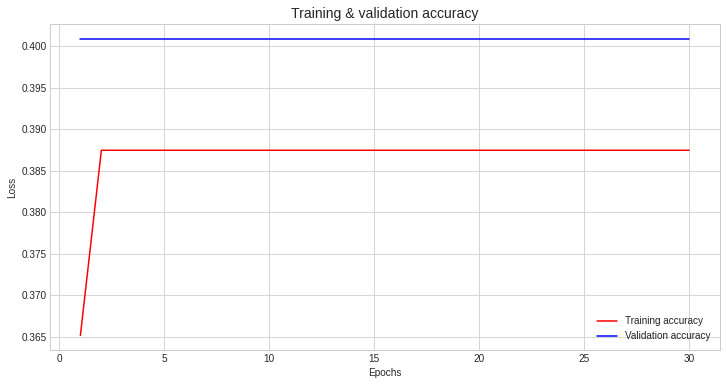

In [ ]:
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history_dict['accuracy'], 'r', label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'blue', label='Validation accuracy')
plt.title('Training & validation accuracy', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

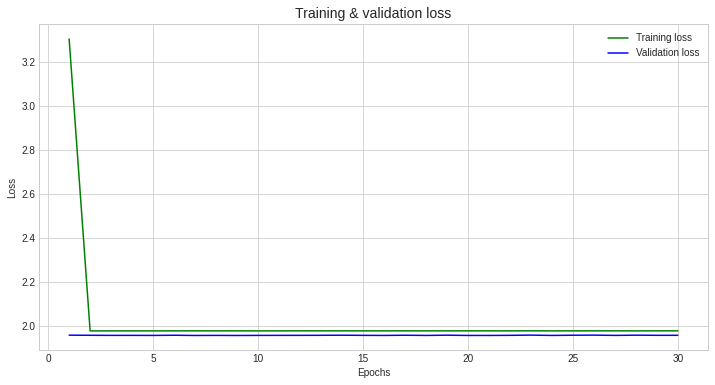

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history_dict['loss'], 'g', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'blue', label='Validation loss')

plt.title('Training & validation loss',fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(train, label_train)

2469/2469 [==============================] - 75s 30ms/step - loss: 1.9770 - accuracy: 0.3888


[1.9770159721374512, 0.38880446553230286]

##Sentiment prediction (Positive, Neutral, Negative)

In [ ]:
def rate(x):
    return 'negative' if x < 4 else 'neutral' if x >= 4 and x < 7 else 'positive'

top_10_conditions['sentiment'] = top_10_conditions.rating.map(rate)

In [ ]:
top_10_conditions.sample(5)

,index,uniqueID,drugName,review,rating,date,usefulCount,year,lemm_review,sentiment
condition,,,,,,,,,,
Anxiety,32828,122193,Venlafaxine,besides excessive sweating this medicine has ...,9,2009-05-26,3,2009,excessive really medicine help besides sweat a...,positive
Depression,29032,96428,Sertraline,i'm a year old female i'm in my first semeste...,9,2010-11-12,100,2010,around half start think first college finally ...,positive
Insomnia,146545,196421,Eszopiclone,don't like it at all the first time i took mg...,2,2015-11-27,25,2015,leave time nasty sleep take first drink pill t...,negative
Bipolar Disorde,79979,64262,Sertraline,feel much better i'm energized and my mood sl...,10,2016-12-19,4,2016,mood day get slowly week energize feel better ...,positive
Birth Control,6906,161466,Ortho Tri-Cyclen,i've been taking ortho tri cyclen lo but i wa...,1,2013-07-27,50,2013,bridezilla take lose like cry cyclen absolutel...,negative


In [ ]:
X_t = hot_pad_sequences(top_10_conditions.review)
y = hot_label_encoding(top_10_conditions.sentiment)

In [ ]:
train, test, label_train, label_test = train_test_split(X_t, y, test_size=0.2, random_state=42)

In [ ]:
backend.clear_session()

In [ ]:
model = Sequential()
model.add(Embedding(3000, 100, input_length=100))
model.add(Conv1D(25, 5, activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          300000    
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 25)            12525     
_________________________________________________________________
global_max_pooling1d (Global (None, 25)                0         
_________________________________________________________________
dense (Dense)                (None, 40)                1040      
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 123       
Total params: 313,688
Trainable params: 313,688
Non-trainable params: 0
__________________________________________________

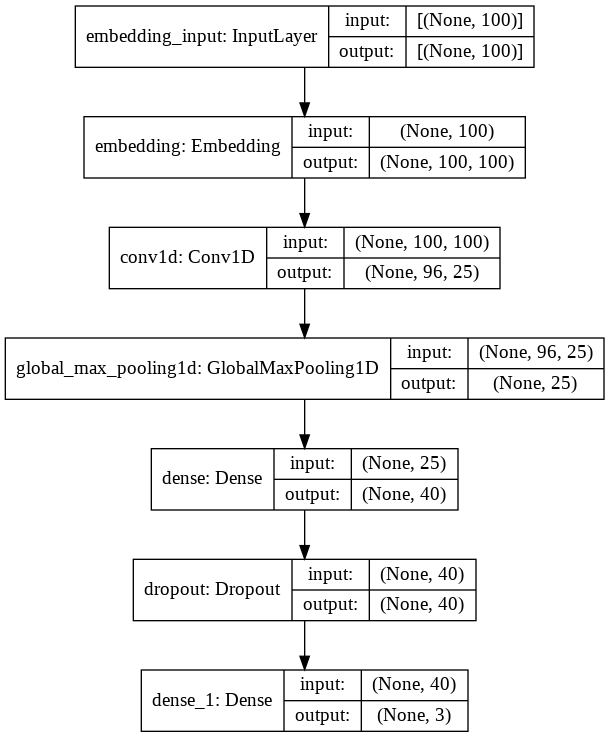

In [ ]:
plot_model(model, to_file='model_plot_SA.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer=optimizers.Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history = model.fit(train, label_train, epochs=50, batch_size=256, validation_split=0.1)

Epoch 1/50
278/278 [==============================] - 31s 110ms/step - loss: 0.7196 - accuracy: 0.7019 - val_loss: 0.5340 - val_accuracy: 0.7903
Epoch 2/50
278/278 [==============================] - 30s 109ms/step - loss: 0.4747 - accuracy: 0.8105 - val_loss: 0.4955 - val_accuracy: 0.8056
Epoch 3/50
278/278 [==============================] - 30s 109ms/step - loss: 0.3642 - accuracy: 0.8576 - val_loss: 0.4564 - val_accuracy: 0.8216
Epoch 4/50
278/278 [==============================] - 31s 110ms/step - loss: 0.2856 - accuracy: 0.8917 - val_loss: 0.4555 - val_accuracy: 0.8340
Epoch 5/50
278/278 [==============================] - 30s 110ms/step - loss: 0.2250 - accuracy: 0.9181 - val_loss: 0.4520 - val_accuracy: 0.8491
Epoch 6/50
278/278 [==============================] - 30s 109ms/step - loss: 0.1736 - accuracy: 0.9387 - val_loss: 0.4924 - val_accuracy: 0.8597
Epoch 7/50
278/278 [==============================] - 30s 109ms/step - loss: 0.1456 - accuracy: 0.9493 - val_loss: 0.5463 - val_ac

In [ ]:
history_dict = history.history

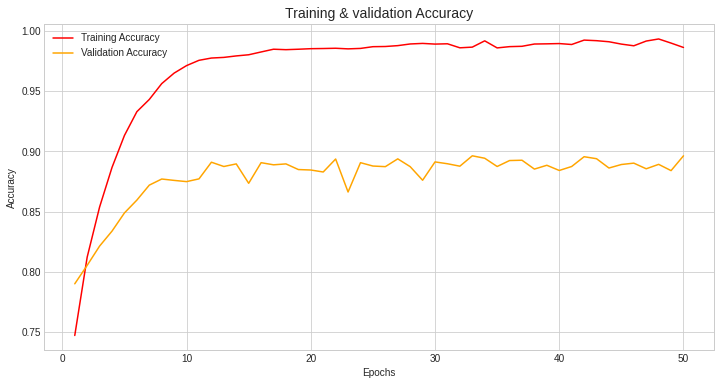

In [ ]:
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history_dict['accuracy'], 'red', label='Training Accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'orange', label='Validation Accuracy')
plt.title('Training & validation Accuracy', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

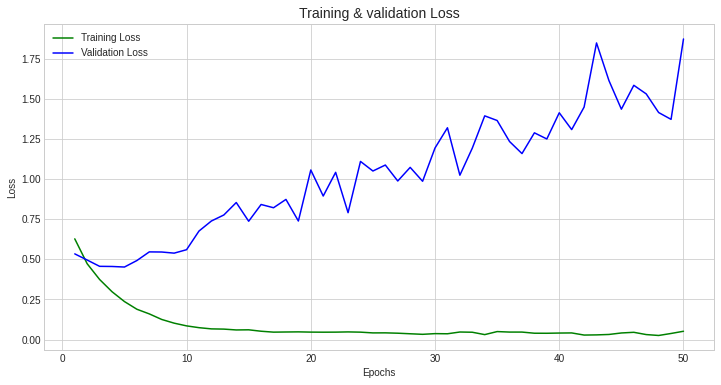

In [ ]:
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history_dict['loss'], 'green', label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], 'blue', label='Validation Loss')
plt.title('Training & validation Loss', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(train, label_train)

2469/2469 [==============================] - 10s 4ms/step - loss: 0.2077 - accuracy: 0.9848


[0.2077232003211975, 0.9848312139511108]

In [ ]:
model.evaluate(test, label_test)

618/618 [==============================] - 3s 4ms/step - loss: 1.8629 - accuracy: 0.8911


[1.8628782033920288, 0.8911116719245911]

##Predicting a Drug Based on Review

In [ ]:
#Selecting 10 most popular drugs

top_drug_for_condition = []
for i in top_10_conditions.index.unique():
    drug_name = top_10_conditions[top_10_conditions.index==i].drugName.value_counts()[:1].keys()[0]
    top_drug_for_condition.append(drug_name)

In [ ]:
top_drugs = pd.DataFrame()
for i in top_drug_for_condition:
    top_drugs = pd.concat([top_drugs, top_10_conditions[top_10_conditions.drugName==i]])

In [ ]:
X_t = hot_pad_sequences(top_drugs.lemm_review, 3000, maxlen=100)
y = hot_label_encoding(top_drugs.drugName)
train, test, label_train, label_test = train_test_split(X_t, y, test_size=0.2, random_state=42)


In [ ]:
train.shape

(10369, 100)

In [ ]:
test.shape

(2593, 100)

In [ ]:
label_test.shape

(2593, 10)

In [ ]:
label_train.shape

(10369, 10)

In [ ]:
label_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
backend.clear_session()

In [ ]:
model = Sequential()
model.add(Embedding(3000, 80, input_length=100))
model.add(Conv1D(60, 2, activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 80)           240000    
_________________________________________________________________
conv1d (Conv1D)              (None, 99, 60)            9660      
_________________________________________________________________
global_max_pooling1d (Global (None, 60)                0         
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 30)                1830      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

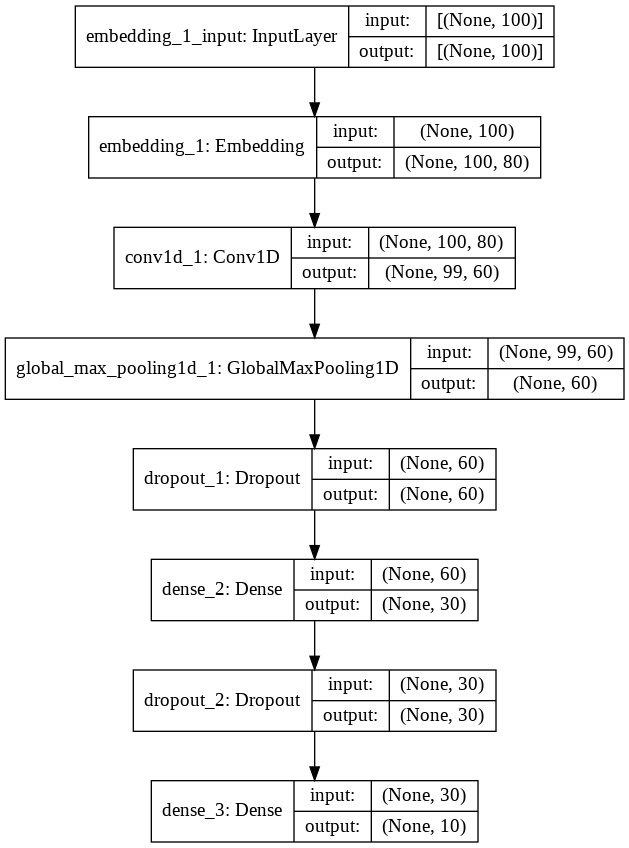

In [ ]:
plot_model(model, to_file='model_plot_DR.png', show_shapes=True, show_layer_names=True)

###Accuracy Model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
train.shape

(10369, 100)

In [ ]:
history = model.fit(train, label_train, epochs=30, validation_split=0.33, batch_size=80,callbacks=[model_checkpoint_callback])

Epoch 1/30
87/87 [==============================] - 3s 31ms/step - loss: 2.1553 - accuracy: 0.2587 - val_loss: 1.4155 - val_accuracy: 0.4822
Epoch 2/30
87/87 [==============================] - 2s 29ms/step - loss: 1.1903 - accuracy: 0.6012 - val_loss: 0.5962 - val_accuracy: 0.8305
Epoch 3/30
87/87 [==============================] - 2s 28ms/step - loss: 0.5330 - accuracy: 0.8545 - val_loss: 0.3777 - val_accuracy: 0.8884
Epoch 4/30
87/87 [==============================] - 2s 28ms/step - loss: 0.3377 - accuracy: 0.9028 - val_loss: 0.3169 - val_accuracy: 0.9021
Epoch 5/30
87/87 [==============================] - 2s 28ms/step - loss: 0.2481 - accuracy: 0.9279 - val_loss: 0.3025 - val_accuracy: 0.9082
Epoch 6/30
87/87 [==============================] - 2s 29ms/step - loss: 0.2109 - accuracy: 0.9379 - val_loss: 0.2977 - val_accuracy: 0.9071
Epoch 7/30
87/87 [==============================] - 2s 28ms/step - loss: 0.1704 - accuracy: 0.9562 - val_loss: 0.2944 - val_accuracy: 0.9030
Epoch 8/30
87

In [ ]:
history_dict = history.history

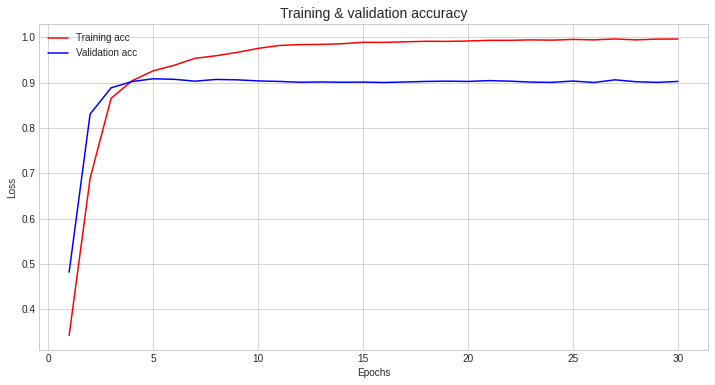

In [ ]:
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history_dict['accuracy'], 'r', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'blue', label='Validation acc')
plt.title('Training & validation accuracy', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

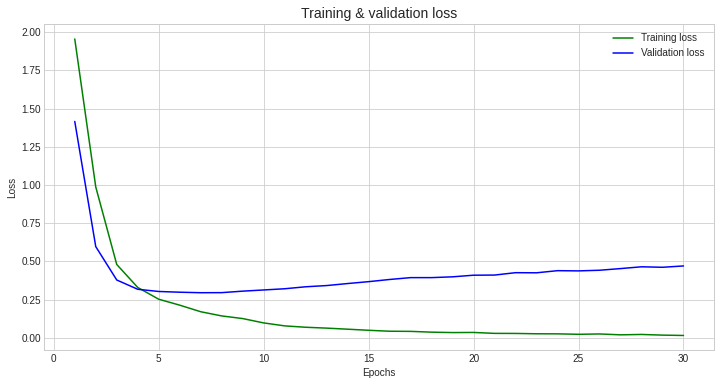

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history_dict['loss'], 'g', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'blue', label='Validation loss')

plt.title('Training & validation loss',fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(train, label_train)

325/325 [==============================] - 1s 3ms/step - loss: 0.1579 - accuracy: 0.9670


[0.1579124480485916, 0.9670170545578003]

In [ ]:
model.evaluate(test, label_test)

82/82 [==============================] - 0s 4ms/step - loss: 0.4914 - accuracy: 0.8990


[0.4914357364177704, 0.8989587426185608]

### MSE model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['mse'])

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

In [ ]:
history = model.fit(train, label_train, epochs=30, validation_split=0.1, batch_size=80,callbacks=[model_checkpoint_callback])

Epoch 1/30
117/117 [==============================] - 18s 27ms/step - loss: 1.9864 - mse: 0.0792 - val_loss: 0.9722 - val_mse: 0.0409
Epoch 2/30
117/117 [==============================] - 3s 22ms/step - loss: 0.7884 - mse: 0.0333 - val_loss: 0.3873 - val_mse: 0.0166
Epoch 3/30
117/117 [==============================] - 3s 22ms/step - loss: 0.3832 - mse: 0.0169 - val_loss: 0.3165 - val_mse: 0.0138
Epoch 4/30
117/117 [==============================] - 3s 22ms/step - loss: 0.2696 - mse: 0.0122 - val_loss: 0.2914 - val_mse: 0.0128
Epoch 5/30
117/117 [==============================] - 3s 22ms/step - loss: 0.2250 - mse: 0.0103 - val_loss: 0.2829 - val_mse: 0.0124
Epoch 6/30
117/117 [==============================] - 3s 22ms/step - loss: 0.1716 - mse: 0.0077 - val_loss: 0.2810 - val_mse: 0.0124
Epoch 7/30
117/117 [==============================] - 3s 22ms/step - loss: 0.1442 - mse: 0.0065 - val_loss: 0.2815 - val_mse: 0.0122
Epoch 8/30
117/117 [==============================] - 3s 22ms/step -

In [ ]:
history_dict = history.history

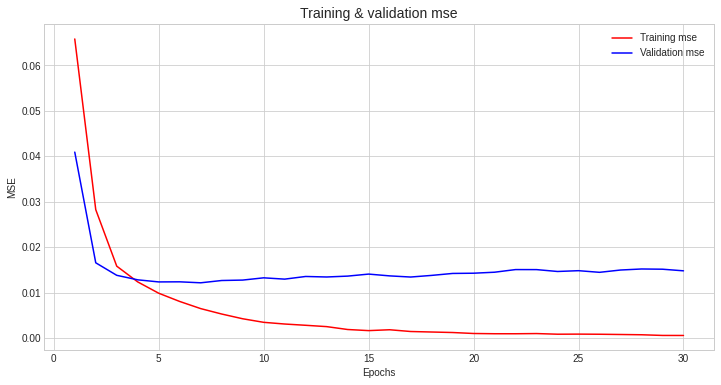

In [ ]:
epochs = range(1, len(history_dict['mse']) + 1)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history_dict['mse'], 'r', label='Training mse')
plt.plot(epochs, history_dict['val_mse'], 'blue', label='Validation mse')
plt.title('Training & validation mse', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

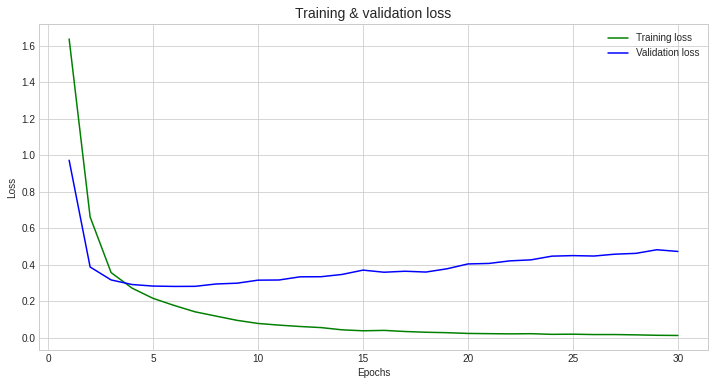

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history_dict['loss'], 'g', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'blue', label='Validation loss')

plt.title('Training & validation loss',fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(train, label_train)

325/325 [==============================] - 1s 3ms/step - loss: 0.0503 - mse: 0.0016


[0.05033571645617485, 0.0015929843066260219]

In [ ]:
model.evaluate(test, label_test)

82/82 [==============================] - 0s 3ms/step - loss: 0.4659 - mse: 0.0156


[0.4658512771129608, 0.015578119084239006]

In [ ]:
drug_prediction_train = model.predict(train)
drug_prediction_test = model.predict(test)

In [ ]:
drug_prediction_test.shape

(2593, 10)

In [ ]:
drug_prediction_test

array([[1.71159542e-07, 5.55173452e-16, 9.99999642e-01, ...,
        1.89583528e-15, 7.00661959e-11, 3.06925362e-12],
       [2.13187680e-01, 5.95992988e-09, 7.86799431e-01, ...,
        3.63648167e-10, 1.34756969e-10, 2.03440360e-13],
       [1.05976554e-16, 1.54274566e-14, 2.00914957e-12, ...,
        1.78475629e-13, 9.05281573e-14, 8.65952910e-16],
       ...,
       [2.05967241e-04, 3.66323278e-04, 3.62201215e-04, ...,
        4.49998275e-04, 1.42269069e-03, 3.18119817e-07],
       [7.69509845e-17, 2.36198144e-15, 3.52996061e-13, ...,
        3.81650981e-15, 1.17445225e-13, 7.98505212e-16],
       [9.63918531e-19, 9.62405717e-17, 6.38352354e-14, ...,
        5.72539003e-16, 1.02299208e-15, 3.29400393e-16]], dtype=float32)

In [ ]:
drug_pred_train = np.argmax(drug_prediction_train, axis=1)
drug_pred_test = np.argmax(drug_prediction_test, axis=1)

In [ ]:
drug_pred_test

array([2, 2, 3, ..., 5, 3, 3])

In [ ]:
label_drug_pred_test = to_categorical(drug_pred_test)

In [ ]:
label_drug_pred_test 

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
drug_test_precision = precision_score(label_test, label_drug_pred_test,average='samples')
print('Precision: %f' % drug_test_precision)

Precision: 0.902430


In [ ]:
drug_test_recall = recall_score(label_test, label_drug_pred_test,average='samples')
print('Recall: %f' % drug_test_recall)   

Recall: 0.902430


In [ ]:
drug_test_f1 = f1_score(label_test, label_drug_pred_test,average='micro')
print('F1 score: %f' % drug_test_f1)

F1 score: 0.902430


In [ ]:
# ROC AUC
drug_test_auc = roc_auc_score(label_test, label_drug_pred_test,average='samples')
print('ROC AUC: %f' % drug_test_auc)

ROC AUC: 0.945794


In [ ]:
# confusion matrix
drug_test_matrix = confusion_matrix(label_test.argmax(axis=1), label_drug_pred_test.argmax(axis=1))
print(drug_test_matrix)

[[145   2  16   0   0   3   5   6   4   3]
 [  3 184   0   1   0   0   1  30   1   2]
 [ 17   5 196   0   1   4   1   4   1   0]
 [  1   1   0 892   7   1   0   4   1   2]
 [  0   0   1   0 129   0   0   0   0   1]
 [  8   2   8   1   0  99   1   6   2   2]
 [  5   2   2   1   0   1 104   3   1   4]
 [  4  22   0   2   0   2   3 361   1   0]
 [  2   4   6   1   0   0   1   1 116   4]
 [  0   3  11   0   1   0   1   4   2 114]]


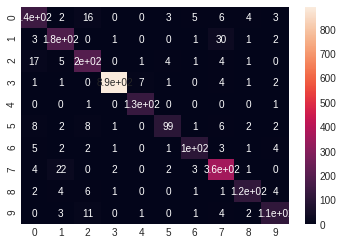

In [ ]:
sns.heatmap(drug_test_matrix,annot=True)

In [ ]:
label_drug_pred_train = to_categorical(drug_pred_train)

In [ ]:
drug_train_precision = precision_score(label_train, label_drug_pred_train,average='samples')
print('Precision: %f' % drug_train_precision)
drug_train_recall = recall_score(label_train, label_drug_pred_train,average='samples')
print('Recall: %f' % drug_train_recall)  
drug_train_f1 = f1_score(label_train, label_drug_pred_train,average='samples')
print('F1 score: %f' % drug_train_f1)
drug_train_auc = roc_auc_score(label_train, label_drug_pred_train,average='samples')
print('ROC AUC: %f' % drug_train_auc)

Precision: 0.990067
Recall: 0.990067
F1 score: 0.990067
ROC AUC: 0.994481


In [ ]:
# confusion matrix
drug_train_matrix = confusion_matrix(label_train.argmax(axis=1), label_drug_pred_train.argmax(axis=1))
print(drug_train_matrix)

[[ 739    2   10    0    0    3    1    0    1    1]
 [   1 1004    0    1    0    0    1   11    0    1]
 [   8    4  969    0    0    1    0    0    2    4]
 [   1    0    0 3482    1    0    0    1    0    0]
 [   0    1    1    0  548    0    0    0    1    0]
 [   4    0    4    0    0  497    0    2    0    2]
 [   1    0    0    0    0    0  426    2    1    0]
 [   1   12    1    0    0    0    0 1635    2    0]
 [   2    1    1    1    0    0    2    0  484    1]
 [   0    0    2    1    0    0    1    0    1  482]]


##Predicting a Drug for Condition Based on Review

In [ ]:
# frequency count of condition 
count = drugs['condition'].value_counts()

In [ ]:
type(count)

pandas.core.series.Series

In [ ]:
count.shape

(916,)

In [ ]:
print(count)

Birth Control                                              38436
Depression                                                 12164
Pain                                                        8245
Anxiety                                                     7812
Acne                                                        7435
                                                           ...  
Esophageal Spasm                                               1
Sporotrichosis                                                 1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
54</span> users found this comment helpful.                    1
Hypopituitarism                                                1
Name: condition, Length: 916, dtype: int64


In [ ]:
count[:10]

Birth Control      38436
Depression         12164
Pain                8245
Anxiety             7812
Acne                7435
Bipolar Disorde     5604
Insomnia            4904
Weight Loss         4857
Obesity             4757
ADHD                4509
Name: condition, dtype: int64

In [ ]:
count[11:20]

Emergency Contraception      3290
High Blood Pressure          3104
Vaginal Yeast Infection      3085
Abnormal Uterine Bleeding    2744
Bowel Preparation            2498
Smoking Cessation            2440
ibromyalgia                  2370
Migraine                     2277
Anxiety and Stress           2236
Name: condition, dtype: int64

In [ ]:
count[21:30]

Constipation                   2120
Chronic Pain                   1940
Panic Disorde                  1932
Migraine Prevention            1867
Urinary Tract Infection        1747
Muscle Spasm                   1631
Osteoarthritis                 1626
Generalized Anxiety Disorde    1542
Opiate Dependence              1477
Name: condition, dtype: int64

In [ ]:
count[31:40]

Irritable Bowel Syndrome    1339
Allergic Rhinitis           1323
Rheumatoid Arthritis        1315
Bacterial Infection         1252
Cough                       1224
Sinusitis                   1124
Nausea/Vomiting             1013
GERD                         968
Overactive Bladde            917
Name: condition, dtype: int64

In [ ]:
count[41:50]

Multiple Sclerosis        913
Hepatitis C               901
High Cholesterol          817
HIV Infection             817
Back Pain                 808
Restless Legs Syndrome    805
Psoriasis                 796
Schizophrenia             789
Constipation, Chronic     770
Name: condition, dtype: int64

In [ ]:
condition = "Birth Control"

In [ ]:
top_condition_drugs = drugs.set_index('drugName').loc[drugs[drugs.condition=='Birth Control'].drugName.value_counts()[:10].keys()]

In [ ]:
top_condition_drugs.shape

(26060, 8)

In [ ]:
top_condition_drugs.index

Index(['Etonogestrel', 'Etonogestrel', 'Etonogestrel', 'Etonogestrel',
       'Etonogestrel', 'Etonogestrel', 'Etonogestrel', 'Etonogestrel',
       'Etonogestrel', 'Etonogestrel',
       ...
       'Lo Loestrin Fe', 'Lo Loestrin Fe', 'Lo Loestrin Fe', 'Lo Loestrin Fe',
       'Lo Loestrin Fe', 'Lo Loestrin Fe', 'Lo Loestrin Fe', 'Lo Loestrin Fe',
       'Lo Loestrin Fe', 'Lo Loestrin Fe'],
      dtype='object', name='drugName', length=26060)

In [ ]:
labels = top_condition_drugs.index
le = preprocessing.LabelEncoder()
le.fit(labels)
labels_cat = le.transform(labels)
y = to_categorical(labels_cat)

In [ ]:
X_t = hot_pad_sequences(top_condition_drugs.lemm_review, 1000, maxlen=100)
#y = hot_label_encoding(top_birthcontrol_drugs.index)
train, test, label_train, label_test = train_test_split(X_t, y, test_size=0.2, random_state=42)

In [ ]:
X_t.shape

(26060, 100)

In [ ]:
y.shape

(26060, 10)

In [ ]:
train.shape

(20848, 100)

In [ ]:
label_train.shape

(20848, 10)

In [ ]:
test.shape

(5212, 100)

In [ ]:
label_test.shape

(5212, 10)

In [ ]:
labels_cat

array([3, 3, 3, ..., 6, 6, 6])

In [ ]:
labels_cat.shape

(26060,)

###Hyperparameters Tuning

In [ ]:
# Using function as a wrapper for a model to feed it into Keras Classifier with parameter we are about to tune
def create_model(dropout_rate=0.2, lr=0.01, conv_filters=25, kernel_size=5):
    backend.clear_session()
    model = Sequential()
    model.add(Embedding(3000, 80, input_length=100))
    model.add(Conv1D(conv_filters, kernel_size, activation='relu'))
    model.add(GlobalMaxPool1D())
    model.add(Dropout(dropout_rate))
    model.add(Dense(40, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    optimizer = optimizers.Adam(lr=lr)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])   
    return model

In [ ]:
# Keras wrapper for skalearn `gridsearch`
model = KerasClassifier(build_fn=create_model)

# Parameters we are intersted in tuning
param_grid = dict(
                    dropout_rate = [0.1, 0.2],                
                    lr = [0.01, 0.1],
                    conv_filters = [20, 25],
                    kernel_size=[5, 10],
                    )

In [ ]:
# Comparing models with different parameters, choosing best one
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(train, label_train, verbose=1, epochs=5, validation_split=0.1)

Epoch 1/5
587/587 [==============================] - 9s 15ms/step - loss: 1.5146 - accuracy: 0.4046 - val_loss: 1.0669 - val_accuracy: 0.5353
Epoch 2/5
587/587 [==============================] - 8s 14ms/step - loss: 1.0459 - accuracy: 0.5400 - val_loss: 1.0779 - val_accuracy: 0.5372
Epoch 3/5
587/587 [==============================] - 9s 15ms/step - loss: 0.9684 - accuracy: 0.5592 - val_loss: 1.0580 - val_accuracy: 0.5329
Epoch 4/5
587/587 [==============================] - 9s 15ms/step - loss: 0.9444 - accuracy: 0.5697 - val_loss: 1.1255 - val_accuracy: 0.5309
Epoch 5/5
587/587 [==============================] - 8s 14ms/step - loss: 0.9359 - accuracy: 0.5705 - val_loss: 1.0921 - val_accuracy: 0.5295


In [ ]:
print("Best Score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Score: 0.536982 using {'conv_filters': 25, 'dropout_rate': 0.1, 'kernel_size': 5, 'lr': 0.01}


##Model Building

In [ ]:
backend.clear_session()

##Conv+Dense

In [ ]:
model = Sequential()
model.add(Embedding(3000, 80, input_length=100))
model.add(Conv1D(25, 5, activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

In [ ]:
model = Sequential()
model.add(Embedding(3000, 80, input_length=100))
model.add(Conv1D(60, 2, activation='relu'))
model.add(Conv1D(60, 2, activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.3))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

In [ ]:
model = Sequential()
model.add(Embedding(1000, 80, input_length=100))
model.add(Conv1D(25, 5, activation='relu'))
model.add(Dropout(0.1))
model.add(GlobalMaxPool1D())
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 80)           80000     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 25)            10025     
_________________________________________________________________
dropout_3 (Dropout)          (None, 96, 25)            0         
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 25)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 40)                1040      
_________________________________________________________________
dropout_4 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 40)               

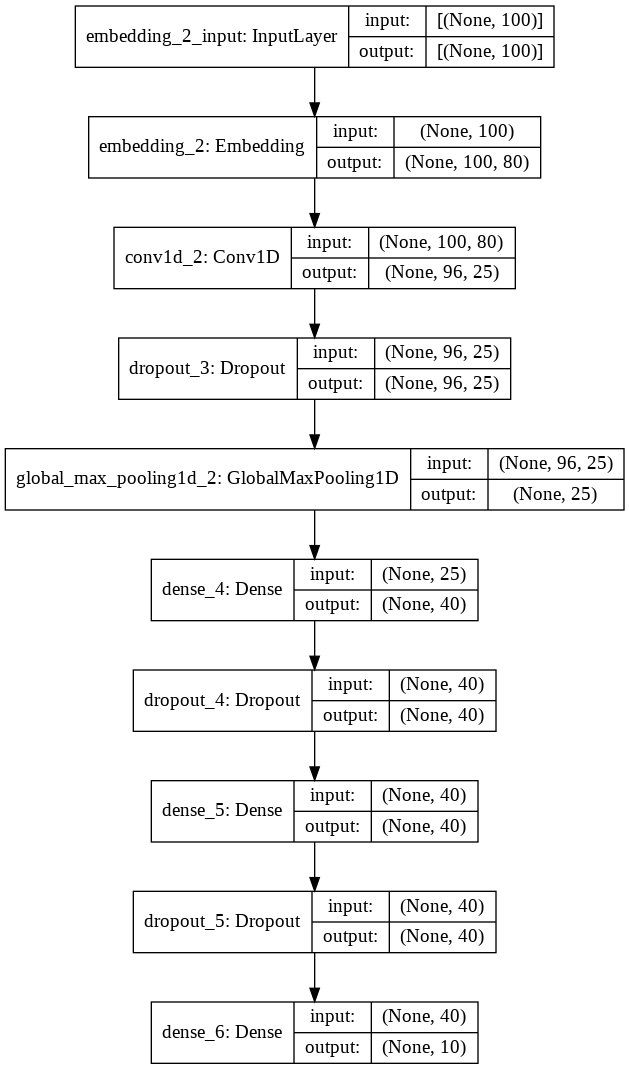

In [ ]:
plot_model(model, to_file='model_plot_DRC.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer=optimizers.Adam(lr=0.01), loss='categorical_crossentropy', metrics=['mse'])

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

In [ ]:
history = model.fit(train, label_train, epochs=30, validation_split=0.1, batch_size=80)
#history = model.fit(X_t, y, epochs=30, validation_split=0.2, batch_size=80)

Epoch 1/30
235/235 [==============================] - 9s 38ms/step - loss: 1.6405 - mse: 0.0735 - val_loss: 1.0985 - val_mse: 0.0572
Epoch 2/30
235/235 [==============================] - 8s 36ms/step - loss: 1.0835 - mse: 0.0575 - val_loss: 1.0367 - val_mse: 0.0549
Epoch 3/30
235/235 [==============================] - 9s 37ms/step - loss: 1.0059 - mse: 0.0546 - val_loss: 1.0065 - val_mse: 0.0537
Epoch 4/30
235/235 [==============================] - 9s 37ms/step - loss: 0.9609 - mse: 0.0534 - val_loss: 0.9964 - val_mse: 0.0537
Epoch 5/30
235/235 [==============================] - 9s 37ms/step - loss: 0.9334 - mse: 0.0525 - val_loss: 1.0226 - val_mse: 0.0543
Epoch 6/30
235/235 [==============================] - 9s 37ms/step - loss: 0.9443 - mse: 0.0528 - val_loss: 1.0432 - val_mse: 0.0555
Epoch 7/30
235/235 [==============================] - 9s 37ms/step - loss: 0.9010 - mse: 0.0515 - val_loss: 1.0447 - val_mse: 0.0553
Epoch 8/30
235/235 [==============================] - 9s 38ms/step - 

In [ ]:
history_dict = history.history

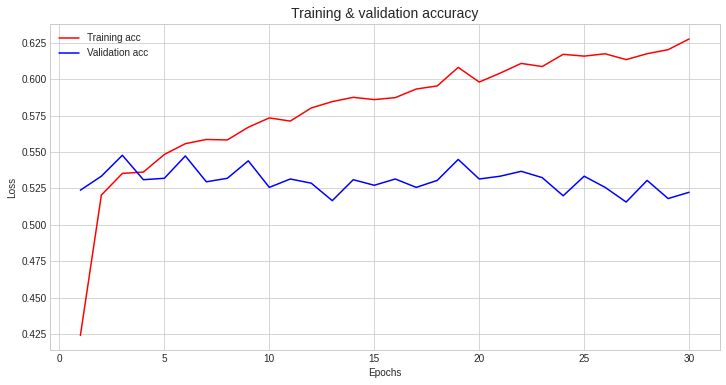

In [ ]:
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history_dict['accuracy'], 'r', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'blue', label='Validation acc')
plt.title('Training & validation accuracy', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
epochs = range(1, len(history_dict['mse']) + 1)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history_dict['mse'], 'r', label='Training mse')
plt.plot(epochs, history_dict['val_mse'], 'blue', label='Validation mse')
plt.title('Training & validation mse', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

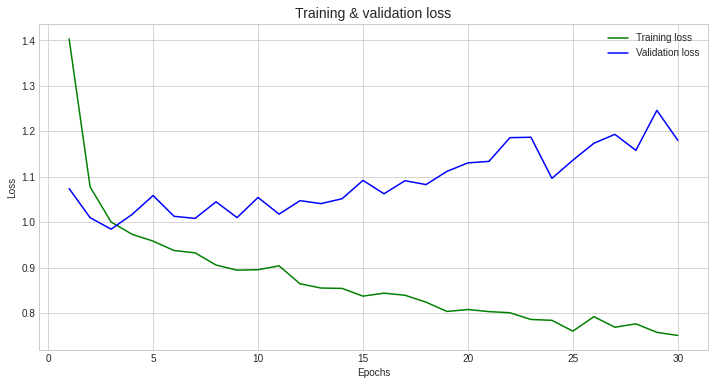

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history_dict['loss'], 'g', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'blue', label='Validation loss')

plt.title('Training & validation loss',fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(train, label_train)

652/652 [==============================] - 4s 6ms/step - loss: 0.7020 - mse: 0.0425


[0.7020271420478821, 0.04251577705144882]

In [ ]:
model.evaluate(test, label_test)

163/163 [==============================] - 1s 6ms/step - loss: 1.2018 - mse: 0.0573


[1.2017754316329956, 0.05732094123959541]

In [ ]:
prediction_train = model.predict(train)
prediction_test = model.predict(test)

In [ ]:
pred_train = np.argmax(prediction_train, axis=1)
pred_train = le.inverse_transform(pred_train)
pred_test = np.argmax(prediction_test, axis=1)
pred_test = le.inverse_transform(pred_test)

In [ ]:
pred_test.shape

(137,)

In [ ]:
pred_train.shape

(548,)

In [ ]:
pred = np.append(pred_train,pred_test)

In [ ]:
prediction = np.unique(pred)

In [ ]:
prediction.shape

(10,)

In [ ]:
prediction

array(['Abacavir / dolutegravir / lamivudine', 'Atripla',
       'Cobicistat / elvitegravir / emtricitabine / tenofovir',
       'Cobicistat / elvitegravir / emtricitabine / tenofovir alafenamide',
       'Complera', 'Efavirenz / emtricitabine / tenofovir',
       'Emtricitabine / rilpivirine / tenofovir', 'Genvoya', 'Stribild',
       'Triumeq'], dtype=object)

In [ ]:
string = ','.join(prediction)

In [ ]:
string

'Abacavir / dolutegravir / lamivudine,Atripla,Cobicistat / elvitegravir / emtricitabine / tenofovir,Cobicistat / elvitegravir / emtricitabine / tenofovir alafenamide,Complera,Efavirenz / emtricitabine / tenofovir,Emtricitabine / rilpivirine / tenofovir,Genvoya,Stribild,Triumeq'

In [ ]:
output_df = pd.read_csv('/content/drugname.csv')

In [ ]:
output_df=output_df[['Condition','Drug Name']]

In [ ]:
output_df.loc[28,'Condition'] = condition

In [ ]:
output_df.loc[28,'Drug Name'] = string

In [ ]:
output_df

,Condition,Drug Name
0,birth control,"Ethinyl estradiol / levonorgestrel,Ethinyl est..."
1,depression,"Bupropion,Citalopram,Cymbalta,Desvenlafaxine,D..."
2,pain,"Acetaminophen / hydrocodone,Acetaminophen / ox..."
3,anxiety,"Alprazolam,BuSpar,Buspirone,Clonazepam,Escital..."
4,acne,"Adapalene / benzoyl peroxide,Benzoyl peroxide ..."
5,bipolar disorde,"Aripiprazole,Asenapine,Lamictal,Lamotrigine,La..."
6,insomnia,"Ambien,Belsomra,Doxepin,Eszopiclone,Lunesta,Qu..."
7,weight loss,"Belviq,Bupropion / naltrexone,Contrave,Liraglu..."
8,obesity,"Belviq,Bupropion / naltrexone,Contrave,Liraglu..."
9,adhd,"Adderall XR,Amphetamine / dextroamphetamine,At..."


In [ ]:
output_df.to_csv('drugname.csv')

##LSTM+Dense

In [ ]:
model = Sequential()
model.add(Embedding(1000, 80,input_length = 100))
model.add(LSTM(25, dropout = 0.1))
#model.add(GlobalMaxPool1D())
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 80)           80000     
_________________________________________________________________
lstm (LSTM)                  (None, 25)                10600     
_________________________________________________________________
dense_7 (Dense)              (None, 40)                1040      
_________________________________________________________________
dropout_6 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                410       
Total params: 92,050
Trainable params: 92,050
Non-trainable params: 0
_________________________________________________________________


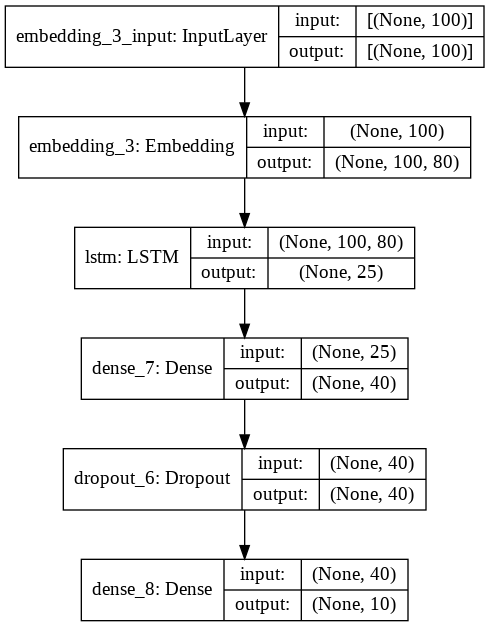

In [ ]:
plot_model(model, to_file='model_plot_DRL.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer=optimizers.Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history = model.fit(train, label_train, epochs=30, validation_split=0.1, batch_size=80)

Epoch 1/30
235/235 [==============================] - 19s 70ms/step - loss: 1.6801 - accuracy: 0.3510 - val_loss: 1.1968 - val_accuracy: 0.4662
Epoch 2/30
235/235 [==============================] - 16s 69ms/step - loss: 1.1711 - accuracy: 0.4567 - val_loss: 1.1264 - val_accuracy: 0.5113
Epoch 3/30
235/235 [==============================] - 16s 69ms/step - loss: 1.0196 - accuracy: 0.5263 - val_loss: 0.9767 - val_accuracy: 0.5372
Epoch 4/30
235/235 [==============================] - 16s 69ms/step - loss: 0.9225 - accuracy: 0.5555 - val_loss: 1.0231 - val_accuracy: 0.5305
Epoch 5/30
235/235 [==============================] - 16s 68ms/step - loss: 0.8869 - accuracy: 0.5610 - val_loss: 1.0305 - val_accuracy: 0.5381
Epoch 6/30
235/235 [==============================] - 16s 68ms/step - loss: 0.8621 - accuracy: 0.5687 - val_loss: 0.9849 - val_accuracy: 0.5309
Epoch 7/30
235/235 [==============================] - 16s 68ms/step - loss: 0.8380 - accuracy: 0.5776 - val_loss: 1.0217 - val_accuracy:

In [ ]:
history_dict = history.history

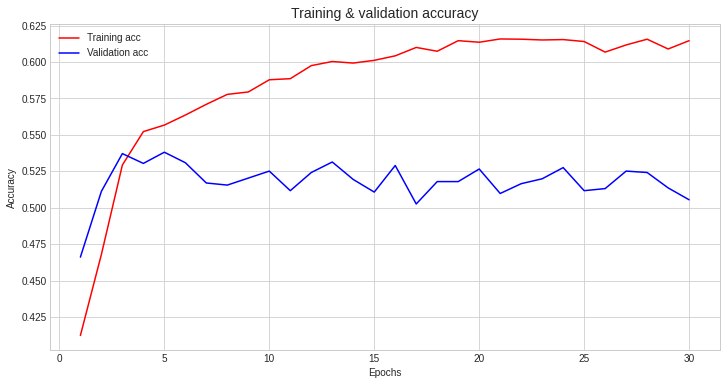

In [ ]:
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history_dict['accuracy'], 'r', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'blue', label='Validation acc')
plt.title('Training & validation accuracy', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

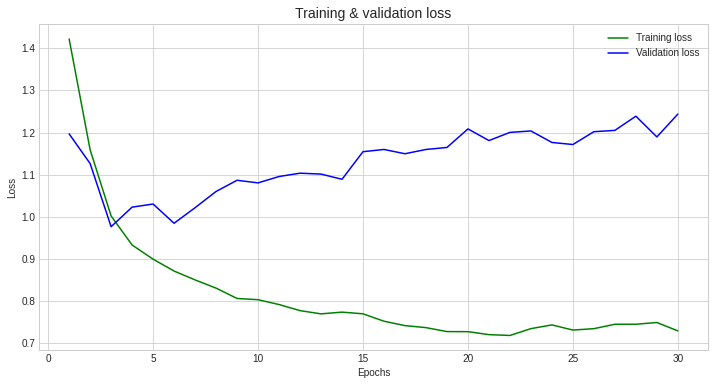

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history_dict['loss'], 'g', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'blue', label='Validation loss')

plt.title('Training & validation loss',fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(train, label_train)

652/652 [==============================] - 7s 11ms/step - loss: 0.6978 - accuracy: 0.6333


[0.697753369808197, 0.6333461403846741]

In [ ]:
model.evaluate(test, label_test)

163/163 [==============================] - 2s 11ms/step - loss: 1.1731 - accuracy: 0.5054


[1.173121452331543, 0.5053722262382507]

### LSTM with MSE

In [ ]:
model.compile(optimizer=optimizers.Adam(lr=0.01), loss='categorical_crossentropy', metrics=['mse'])

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

In [ ]:
history = model.fit(train, label_train, epochs=30, validation_split=0.1, batch_size=80)

Epoch 1/30
235/235 [==============================] - 32s 50ms/step - loss: 1.7829 - mse: 0.0776 - val_loss: 1.2880 - val_mse: 0.0663
Epoch 2/30
235/235 [==============================] - 11s 46ms/step - loss: 1.2118 - mse: 0.0637 - val_loss: 1.1649 - val_mse: 0.0617
Epoch 3/30
235/235 [==============================] - 11s 46ms/step - loss: 1.0880 - mse: 0.0592 - val_loss: 1.0320 - val_mse: 0.0557
Epoch 4/30
235/235 [==============================] - 11s 47ms/step - loss: 0.9460 - mse: 0.0529 - val_loss: 0.9913 - val_mse: 0.0534
Epoch 5/30
235/235 [==============================] - 11s 47ms/step - loss: 0.8885 - mse: 0.0511 - val_loss: 0.9933 - val_mse: 0.0536
Epoch 6/30
235/235 [==============================] - 11s 47ms/step - loss: 0.8800 - mse: 0.0506 - val_loss: 1.0159 - val_mse: 0.0544
Epoch 7/30
235/235 [==============================] - 11s 47ms/step - loss: 0.8503 - mse: 0.0494 - val_loss: 1.0014 - val_mse: 0.0540
Epoch 8/30
235/235 [==============================] - 11s 46ms

In [ ]:
history_dict = history.history

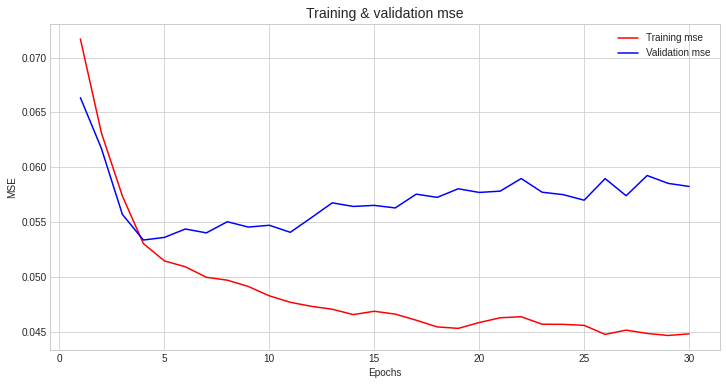

In [ ]:
epochs = range(1, len(history_dict['mse']) + 1)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history_dict['mse'], 'r', label='Training mse')
plt.plot(epochs, history_dict['val_mse'], 'blue', label='Validation mse')
plt.title('Training & validation mse', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

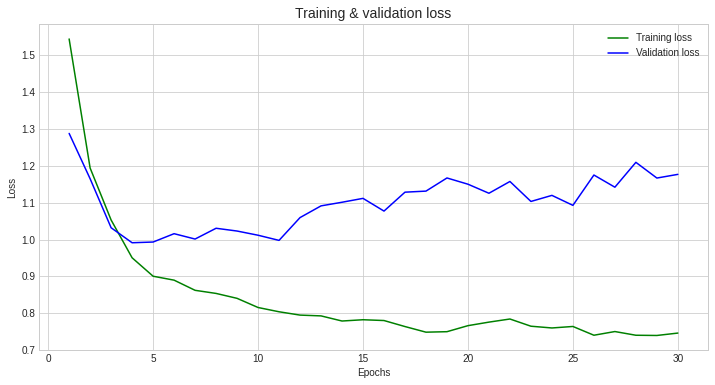

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history_dict['loss'], 'g', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'blue', label='Validation loss')

plt.title('Training & validation loss',fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(train, label_train)

652/652 [==============================] - 5s 8ms/step - loss: 0.7234 - mse: 0.0434


[0.7233595848083496, 0.043391451239585876]

In [ ]:
model.evaluate(test, label_test)

163/163 [==============================] - 1s 8ms/step - loss: 1.1441 - mse: 0.0568


[1.1440790891647339, 0.0567573681473732]

In [ ]:
lstm_prediction_train = model.predict(train)
lstm_prediction_test = model.predict(test)

In [ ]:
lstm_prediction_train.shape

(20848, 10)

In [ ]:
lstm_prediction_test.shape

(5212, 10)

In [ ]:
lstm_prediction_test

array([[2.3766141e-02, 1.9578559e-02, 3.6089346e-02, ..., 3.0534167e-03,
        8.1117242e-04, 4.4046170e-03],
       [2.0306747e-04, 4.5297283e-01, 3.9689051e-04, ..., 1.2764595e-07,
        5.0268691e-06, 6.0532651e-10],
       [4.8643156e-05, 1.3492884e-05, 7.2803236e-06, ..., 4.2700899e-01,
        1.5582949e-04, 1.3762444e-01],
       ...,
       [2.6999330e-06, 2.4862999e-07, 1.3499137e-07, ..., 7.2918802e-02,
        2.7245871e-05, 4.9241567e-01],
       [3.4743571e-05, 1.2362844e-04, 5.4353891e-06, ..., 7.9028606e-03,
        3.7534371e-01, 6.1748557e-05],
       [1.7902845e-01, 4.3997562e-01, 2.2604658e-01, ..., 1.7605670e-04,
        1.3964199e-03, 1.3469789e-03]], dtype=float32)

In [ ]:
lstm_pred_train = np.argmax(lstm_prediction_train, axis=1)
lstm_pred_test = np.argmax(lstm_prediction_test, axis=1)

In [ ]:
lstm_pred_test

array([5, 6, 5, ..., 9, 3, 1])

In [ ]:
label_lstm_pred_test = to_categorical(lstm_pred_test)

In [ ]:
label_lstm_pred_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
label_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
precision = precision_score(testy, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes)
print('F1 score: %f' % f1)

In [ ]:
lstm_test_precision = precision_score(label_test, label_lstm_pred_test,average='samples')
print('Precision: %f' % lstm_test_precision)

Precision: 0.516692


In [ ]:
lstm_test_recall = recall_score(label_test, label_lstm_pred_test,average='micro')
print('Recall: %f' % lstm_test_recall)    

Recall: 0.516692


In [ ]:
lstm_test_f1 = f1_score(label_test, label_lstm_pred_test,average='micro')
print('F1 score: %f' % lstm_test_f1)

F1 score: 0.516692


## Classical ML Models

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 67kB/s 


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [ ]:
models = [
          #['DecisionTree :',DecisionTreeRegressor()],
          # ['Linear Regression :', LinearRegression()],
          # ['RandomForest :',RandomForestRegressor()],
          # ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
          # ['SVM :', SVR()],
          # ['AdaBoostRegressor :', AdaBoostRegressor()],
          # ['GradientBoostingRegressor: ', GradientBoostingRegressor()],
          # ['Xgboost: ', XGBRegressor()],
          #['Catboost: ', CatBoostRegressor(logging_level='Silent')],
          # ['Lasso: ', Lasso()],
          #  ['Ridge: ', Ridge()],
          # ['BayesianRidge: ', BayesianRidge()],
          # ['ElasticNet: ', ElasticNet()],
          # ['HuberRegressor: ', HuberRegressor()]
          ]

In [ ]:
print("Results...")
for name,model in models:
    model = model
    model.fit(train, label_train)
    predictions = model.predict(test)
    print("MSE")
    print(name, (mean_squared_error(label_test, predictions)))
    print("Test Accuracy")
    print(model.score(test,label_test))
    print("Train Accuracy")
    print(model.score(test,label_test))